In [ ]:
%pylab inline
%matplotlib inline
#!pip install git+https://github.com/jakevdp/JSAnimation.git

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# Perfect sensor
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [ ]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    RX = 4
    RY = 2
    
    ux = RX * sqrt(3) * sin(2*t) + RY * cos(2*t)
    uy = RX * sin(2*t) - RY * sqrt(3) * cos(2*t)
    
    return array([ux, uy])

In [ ]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([-0.6, 0.5])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

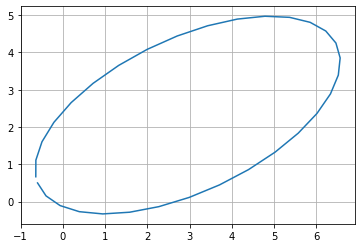

In [ ]:
grid()
plot(x_log[:,0], x_log[:,1])

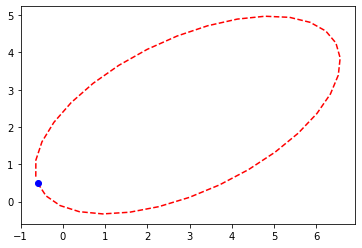

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())